# Simple Analysis of Top 1000 Instagram Influencer Profiles 2022
#### **By Ika Nurfitriani**

# A. Import library

**Import beberapa library yang dibutuhkan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

# B. Data Loading

**Open/Read dataset**

In [2]:
df_inst = pd.read_csv("instadataset.csv")
df_inst

,Name,Rank,Category,Followers in millions,Audience Country,Authentic Engagement in M,Engagement Avg. in M
0,cristiano,1,Sports with a ball,462900000,India,5.5,6.6
1,leomessi,2,Sports with a ballFamily,347200000,Argentina,3.6,4.8
2,kendalljenner,3,ModelingFashion,247600000,United States,3.0,4.9
3,arianagrande,4,Music,321400000,United States,2.4,3.4
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,4.3,5.8
...,...,...,...,...,...,...,...
995,nimratkhairaofficial,996,Music,8000000,India,211.1,261.8
996,hanhyojoo222,997,TravelCinema & Actors/actresses,4000000,Indonesia,434.2,518.2
997,memphisdepay,998,Sports with a ball,15000000,France,76.4,135.5
998,arminzareeiofficial,999,NaN,9800000,Iran,135.4,214.0


**Melihat informasi dimensi dataset**

In [3]:
rows, columns = df_inst.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
1000 baris
7 kolom


**Melihat tipe data semua kolom**

In [4]:
df_inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       1000 non-null   object 
 1   Rank                       1000 non-null   int64  
 2   Category                   916 non-null    object 
 3   Followers in millions      1000 non-null   int64  
 4   Audience Country           986 non-null    object 
 5   Authentic Engagement in M  1000 non-null   float64
 6   Engagement Avg. in M       1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


**Melihat nama-nama kolom dari dataframe**

In [5]:
df_inst.columns

Index(['Name', 'Rank', 'Category', 'Followers in millions', 'Audience Country',
       'Authentic Engagement in M', 'Engagement Avg. in M'],
      dtype='object')

**Melihat deskriptif statistik data**

In [6]:
df_inst.describe()

,Rank,Followers in millions,Authentic Engagement in M,Engagement Avg. in M
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.604460e+07,302.163500,335.498900
std,288.819436,4.409884e+07,244.203526,269.317813
min,1.000000,1.600000e+06,0.000000,1.000000
25%,250.750000,8.600000e+06,118.800000,128.125000
50%,500.500000,1.410000e+07,238.350000,283.050000
75%,750.250000,2.542500e+07,447.000000,529.200000
max,1000.000000,5.284000e+08,990.900000,998.200000


# C. Data Cleaning

**Melihat jumlah data yang unik**

In [7]:
df_inst.nunique()

Name                          962
Rank                         1000
Category                      153
Followers in millions         415
Audience Country               33
Authentic Engagement in M     836
Engagement Avg. in M          809
dtype: int64

**Mengecek missing values**

In [8]:
print("Total missing values semua kolom =", df_inst.isnull().sum())

Total missing values semua kolom = Name                          0
Rank                          0
Category                     84
Followers in millions         0
Audience Country             14
Authentic Engagement in M     0
Engagement Avg. in M          0
dtype: int64


**Mengganti nilai missing values dengan Unknown**

In [9]:
df_inst["Category"].fillna("Unknown", inplace=True)
df_inst["Audience Country"].fillna("Unknown", inplace=True)

**Mengecek kembali missing values**

In [10]:
print("Total missing values semua kolom =", df_inst.isnull().sum())

Total missing values semua kolom = Name                         0
Rank                         0
Category                     0
Followers in millions        0
Audience Country             0
Authentic Engagement in M    0
Engagement Avg. in M         0
dtype: int64


**Mengecek duplicated data**

In [11]:
print("Jumlah duplicated data =", df_inst.duplicated().sum())

Jumlah duplicated data = 0


**Melihat kembali informasi dimensi dari dataset**

In [12]:
rows, columns = df_inst.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
1000 baris
7 kolom


**Mengganti nama kolom**

In [13]:
df_inst.rename(columns={'Followers in millions':'Followers',
                        'Audience Country':'AudienceCountry',
                        'Authentic Engagement in M':'Authentic-Engagement',
                        'Engagement Avg. in M':'Engagement-Avg'}, inplace=True)
df_inst.head()

,Name,Rank,Category,Followers,AudienceCountry,Authentic-Engagement,Engagement-Avg
0,cristiano,1,Sports with a ball,462900000,India,5.5,6.6
1,leomessi,2,Sports with a ballFamily,347200000,Argentina,3.6,4.8
2,kendalljenner,3,ModelingFashion,247600000,United States,3.0,4.9
3,arianagrande,4,Music,321400000,United States,2.4,3.4
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,4.3,5.8


# D. Exploratory Data Analysis (EDA)

## Bagaimana audience country yang berasal dari Indonesia (Followers terbanyak berasal dari Indonesia)?

In [14]:
df_ina = df_inst[df_inst['AudienceCountry']=='Indonesia']
df_ina

,Name,Rank,Category,Followers,AudienceCountry,Authentic-Engagement,Engagement-Avg
10,lalalalisa_m,11,Music,79900000,Indonesia,6.3,7.3
11,jennierubyjane,12,Music,68200000,Indonesia,7.0,8.3
19,sooyaaa__,20,MusicBeauty,62100000,Indonesia,4.9,5.6
24,roses_are_rosie,25,Music,61000000,Indonesia,4.0,4.6
30,bts.bighitofficial,31,Music,66000000,Indonesia,3.0,3.3
...,...,...,...,...,...,...,...
981,ho5hi_kwon,982,Unknown,3000000,Indonesia,547.0,712.1
986,jxxvvxxk,987,Unknown,3400000,Indonesia,489.8,614.3
989,wayvofficial,990,Music,7300000,Indonesia,238.2,283.7
992,thariqhalilintar,993,Shows,7400000,Indonesia,225.6,279.5


## Bagaimana audience country yang berasal dari US (Followers terbanyak berasal dari US)?

In [15]:
df_us = df_inst[df_inst['AudienceCountry']=='United States']
df_us

,Name,Rank,Category,Followers,AudienceCountry,Authentic-Engagement,Engagement-Avg
2,kendalljenner,3,ModelingFashion,247600000,United States,3.0,4.9
3,arianagrande,4,Music,321400000,United States,2.4,3.4
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,4.3,5.8
5,kimkardashian,6,FashionBeauty,323600000,United States,1.7,2.5
7,kyliejenner,8,FashionModelingBeauty,357000000,United States,1.2,1.9
...,...,...,...,...,...,...,...
982,melissabenoist,983,FamilyCinema & Actors/actresses,4800000,United States,324.7,439.5
983,barstoolsports,984,Lifestyle,13900000,United States,98.2,148.2
985,5sos,986,Music,10100000,United States,147.4,203.6
987,lynaritaa,988,Lifestyle,9000000,United States,176.7,234.1


## Bagaimana audience country yang berasal dari India (Followers terbanyak berasal dari India)?

In [16]:
df_ind = df_inst[df_inst['AudienceCountry']=='India']
df_ind.head()

,Name,Rank,Category,Followers,AudienceCountry,Authentic-Engagement,Engagement-Avg
0,cristiano,1,Sports with a ball,462900000,India,5.5,6.6
12,virat.kohli,13,Sports with a ball,206900000,India,2.1,2.4
22,khaby00,23,Sports with a ball,78600000,India,2.8,3.9
23,justinbieber,24,Music,245900000,India,798.5,1.2
28,instagram,29,Photography,528400000,India,339.6,434.3


## Bagaimana audience country yang berasal dari Brazil (Followers terbanyak berasal dari Brazil)?

In [17]:
df_brazil = df_inst[df_inst['AudienceCountry']=='Brazil']
df_brazil.tail()

,Name,Rank,Category,Followers,AudienceCountry,Authentic-Engagement,Engagement-Avg
947,e_milygarcia,948,Cinema & Actors/actresses,11200000,Brazil,119.2,197.2
951,ncentineo,952,Cinema & Actors/actresses,16800000,Brazil,77.8,129.2
956,sabinahidalgo,957,LifestyleMusicArt/Artists,4700000,Brazil,399.6,479.5
966,roberto_firmino,967,Sports with a ball,13600000,Brazil,104.7,156.1
972,bypamella,973,Shows,9800000,Brazil,127.8,218.9


## Bagaimana audience country dari Indonesia terhadap kategori Music?

In [18]:
music = df_ina[df_ina['Category'].str.contains('Music')]
music

,Name,Rank,Category,Followers,AudienceCountry,Authentic-Engagement,Engagement-Avg
10,lalalalisa_m,11,Music,79900000,Indonesia,6.3,7.3
11,jennierubyjane,12,Music,68200000,Indonesia,7.0,8.3
19,sooyaaa__,20,MusicBeauty,62100000,Indonesia,4.9,5.6
24,roses_are_rosie,25,Music,61000000,Indonesia,4.0,4.6
30,bts.bighitofficial,31,Music,66000000,Indonesia,3.0,3.3
47,eunwo.o_c,48,MusicLifestyle,29200000,Indonesia,3.6,4.5
78,oohsehun,79,Music,23300000,Indonesia,1.7,2.1
93,blackpinkofficial,94,Music,47700000,Indonesia,700.1,853.0
98,realstraykids,99,Music,21900000,Indonesia,1.5,1.8
103,twicetagram,104,MusicModeling,26100000,Indonesia,1.2,1.5


## Bagaimana audience country dari US terhadap kategori Fashion?

In [19]:
fashion = df_us[df_us['Category'].str.contains('Fashion')]
fashion

,Name,Rank,Category,Followers,AudienceCountry,Authentic-Engagement,Engagement-Avg
2,kendalljenner,3,ModelingFashion,247600000,United States,3.0,4.9
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,4.3,5.8
5,kimkardashian,6,FashionBeauty,323600000,United States,1.7,2.5
7,kyliejenner,8,FashionModelingBeauty,357000000,United States,1.2,1.9
17,beyonce,18,MusicFashion,267400000,United States,949.9,1.3
31,iamcardib,32,MusicFashion,137300000,United States,1.1,1.5
45,harrystyles,46,MusicFashion,46300000,United States,2.1,2.9
359,demirose,360,ModelingLifestyleFashion,19900000,United States,305.4,398.2
497,hshq,498,MusicCinema & Actors/actressesFashion,6300000,United States,488.2,859.0
639,taylor_hill,640,Art/ArtistsFashionModeling,19900000,United States,126.9,189.4


## Bagaimana audience country dari India terhadap kategori Sports?

In [20]:
sports = df_ind[df_ind['Category'].str.contains('Sports')]
sports

,Name,Rank,Category,Followers,AudienceCountry,Authentic-Engagement,Engagement-Avg
0,cristiano,1,Sports with a ball,462900000,India,5.5,6.6
12,virat.kohli,13,Sports with a ball,206900000,India,2.1,2.4
22,khaby00,23,Sports with a ball,78600000,India,2.8,3.9
164,rohitsharma45,165,Sports with a ballLifestyle,24400000,India,810.3,914.3
205,hardikpandya93,206,Sports with a ball,21700000,India,625.4,784.1
215,davidbeckham,216,FamilySports with a ball,74500000,India,169.0,217.1
238,klrahul,239,Sports with a ball,12900000,India,872.1,1.1
267,sachintendulkar,268,Sports with a ballLifestyle,35100000,India,289.9,346.5
488,indiancricketteam,489,Sports with a ball,24600000,India,189.9,221.4
506,abdevilliers17,507,Sports with a ballLifestyle,18400000,India,245.3,283.6


## Bagaimana audience country terhadap kategori Music?

In [21]:
musik = df_inst[df_inst['Category'].str.contains('Music')]
musik

,Name,Rank,Category,Followers,AudienceCountry,Authentic-Engagement,Engagement-Avg
3,arianagrande,4,Music,321400000,United States,2.4,3.4
6,taylorswift,7,Music,218200000,Brazil,2.4,3.2
8,selenagomez,9,MusicLifestyle,334900000,United States,1.4,1.9
10,lalalalisa_m,11,Music,79900000,Indonesia,6.3,7.3
11,jennierubyjane,12,Music,68200000,Indonesia,7.0,8.3
...,...,...,...,...,...,...,...
988,tomo.y9,989,MusicArt/Artists,5000000,Japan,393.6,422.0
989,wayvofficial,990,Music,7300000,Indonesia,238.2,283.7
990,supremo_dp,991,Music,5000000,Philippines,337.9,416.3
991,jaredleto,992,MusicCinema & Actors/actresses,10900000,United States,149.9,188.5


## Bagaimana audience country terhadap kategori Sports?

In [22]:
sport = df_inst[df_inst['Category'].str.contains('Sports')]
sport

,Name,Rank,Category,Followers,AudienceCountry,Authentic-Engagement,Engagement-Avg
0,cristiano,1,Sports with a ball,462900000,India,5.5,6.6
1,leomessi,2,Sports with a ballFamily,347200000,Argentina,3.6,4.8
12,virat.kohli,13,Sports with a ball,206900000,India,2.1,2.4
21,neymarjr,22,Sports with a ball,176200000,Brazil,1.3,1.8
22,khaby00,23,Sports with a ball,78600000,India,2.8,3.9
...,...,...,...,...,...,...,...
948,jharden13,949,Sports with a ball,11600000,United States,109.8,188.4
952,valeyellow46,953,Racing Sports,13900000,Indonesia,119.3,155.9
966,roberto_firmino,967,Sports with a ball,13600000,Brazil,104.7,156.1
969,warriors,970,LifestyleSports with a ball,24800000,United States,60.9,85.5


## Bar Chart

### 1. Top 10 Name by Followers

In [23]:
top10followers = df_inst.nlargest(10, 'Followers')
top10followers

,Name,Rank,Category,Followers,AudienceCountry,Authentic-Engagement,Engagement-Avg
28,instagram,29,Photography,528400000,India,339.6,434.3
0,cristiano,1,Sports with a ball,462900000,India,5.5,6.6
7,kyliejenner,8,FashionModelingBeauty,357000000,United States,1.2,1.9
1,leomessi,2,Sports with a ballFamily,347200000,Argentina,3.6,4.8
8,selenagomez,9,MusicLifestyle,334900000,United States,1.4,1.9
40,therock,41,Cinema & Actors/actressesFitness & Gym,327300000,India,373.2,479.8
5,kimkardashian,6,FashionBeauty,323600000,United States,1.7,2.5
3,arianagrande,4,Music,321400000,United States,2.4,3.4
17,beyonce,18,MusicFashion,267400000,United States,949.9,1.3
18,khloekardashian,19,Clothing & OutfitsLifestyle,260400000,United States,1.1,1.4


**Membuat bar chart yang berisi 10 nama terbaik/teratas menurut followers**

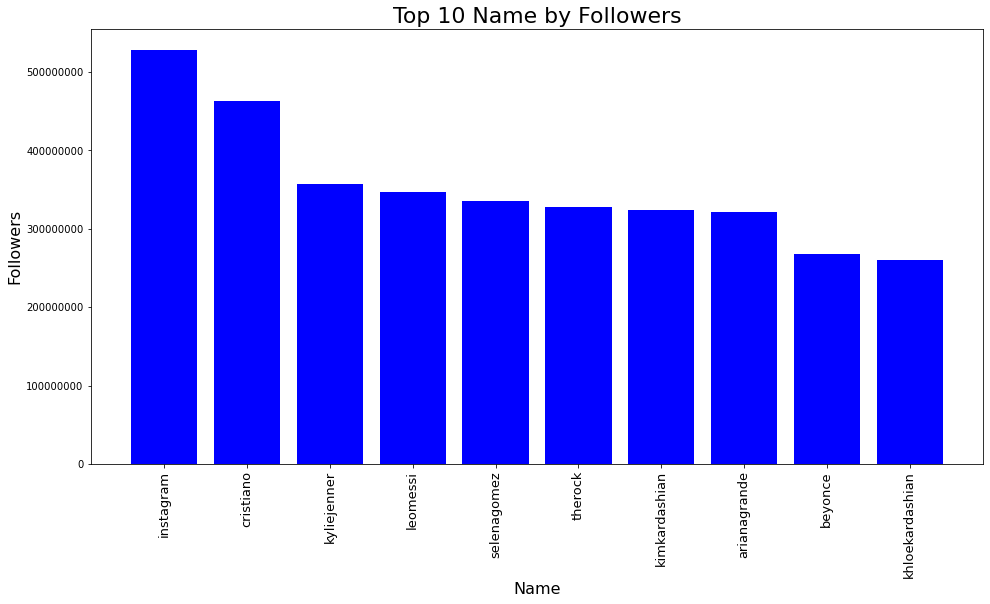

In [24]:
plt.figure(figsize=(16, 8))
fig2 = plt.bar(top10followers.Name, top10followers.Followers, label = "Followers", width = 0.8, color = 'b')
plt.xticks(fontsize = 13, rotation = 90)
plt.xlabel("Name", fontsize = 16)
plt.ylabel("Followers", fontsize = 16)
plt.title("Top 10 Name by Followers", fontsize = 22)
plt.tight_layout
plt.ticklabel_format(axis="y", style = 'plain')

### 2. Top 10 Category by Followers

**Membuat bar chart yang berisi 10 kategori terbaik/teratas menurut followers**

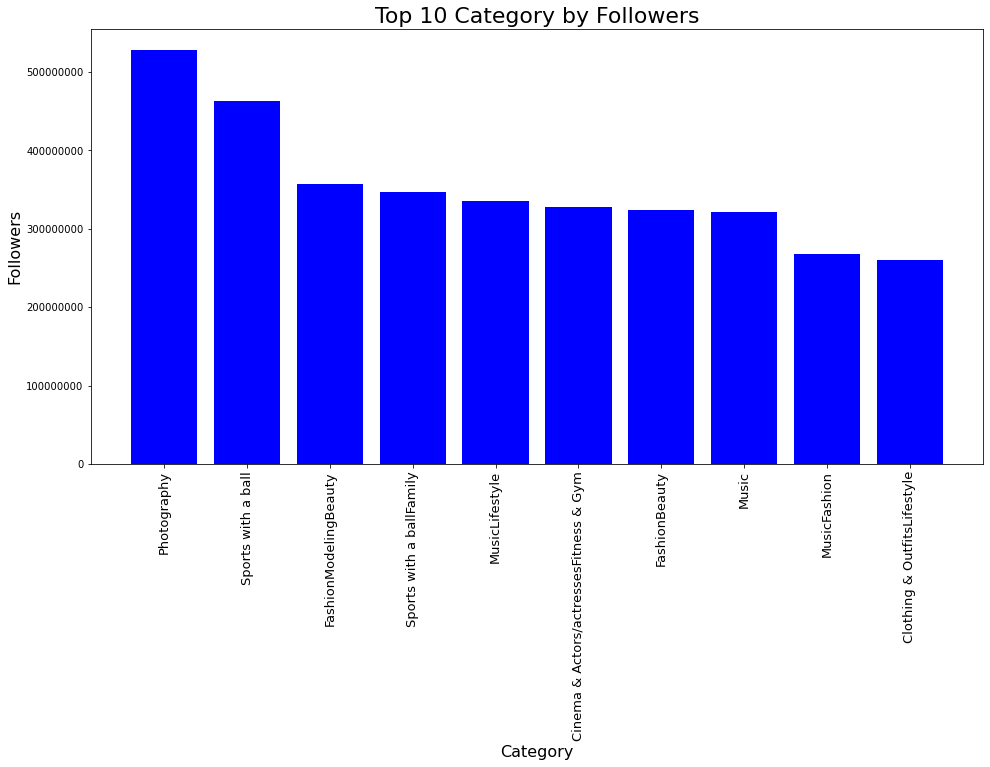

In [25]:
plt.figure(figsize=(16, 8))
fig2 = plt.bar(top10followers.Category, top10followers.Followers, label = "Followers", width = 0.8, color = 'b')
plt.xticks(fontsize = 13, rotation = 90)
plt.xlabel("Category", fontsize = 16)
plt.ylabel("Followers", fontsize = 16)
plt.title("Top 10 Category by Followers", fontsize = 22)
plt.tight_layout
plt.ticklabel_format(axis="y", style = 'plain')

### 3. Top 3 Audience Country by Followers

**Membuat bar chart yang berisi 3 audience country teratas menurut followers**

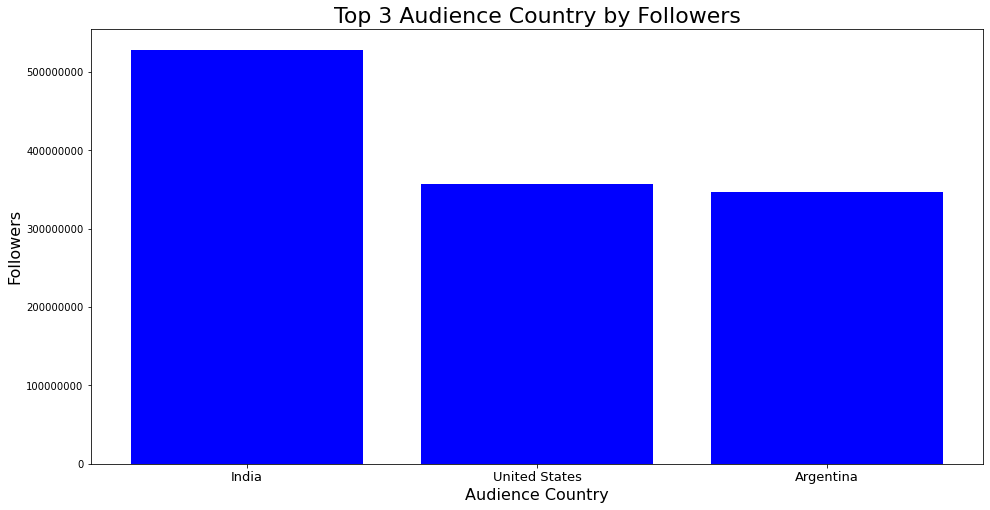

In [26]:
plt.figure(figsize=(16, 8))
fig2 = plt.bar(top10followers.AudienceCountry, top10followers.Followers, label = "Followers", width = 0.8, color = 'b')
plt.xticks(fontsize = 13, rotation = 0)
plt.xlabel("Audience Country", fontsize = 16)
plt.ylabel("Followers", fontsize = 16)
plt.title("Top 3 Audience Country by Followers", fontsize = 22)
plt.tight_layout
plt.ticklabel_format(axis="y", style = 'plain')

## Pie Chart
### 1. Number of categories from highest to lowest

**Membuat dataframe baru yang hanya berisi value dari kolom Category**

In [27]:
types = df_inst.Category.value_counts()
types.reset_index()

,index,Category
0,Music,167
1,Cinema & Actors/actresses,149
2,Sports with a ball,105
3,Unknown,84
4,Lifestyle,77
...,...,...
149,MusicFamily,1
150,Cinema & Actors/actressesComics & sketchesShows,1
151,Art/ArtistsBeauty,1
152,Computers & GadgetsBusiness & Careers,1


**Membuat pie chart yang berisi jumlah Category dari tertinggi ke terendah**

[]

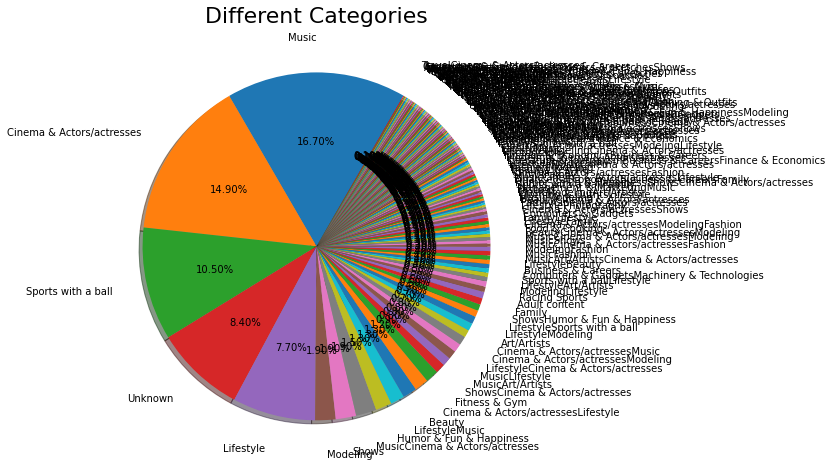

In [28]:
plt.figure(figsize=(25, 8))
plt.pie(types.values, labels = types.index, labeldistance=1.2, autopct='%1.2f%%', shadow=True, startangle=60)
plt.title("Different Categories", fontsize = 22)
plt.plot()

### 2. Number of audience countries from highest to lowest

**Membuat dataframe baru yang hanya berisi value dari kolom audience country**

In [29]:
negara = df_inst.AudienceCountry.value_counts()
negara.reset_index()

,index,AudienceCountry
0,United States,277
1,India,159
2,Brazil,145
3,Indonesia,136
4,Mexico,40
5,Spain,34
6,Russia,26
7,Argentina,23
8,Iran,21
9,Turkey,20


**Membuat pie chart yang berisi jumlah audience country dari tertinggi ke terendah**

[]

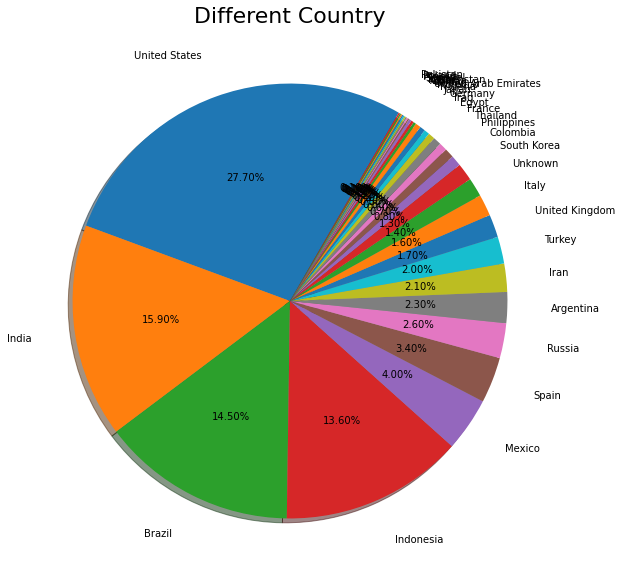

In [30]:
plt.figure(figsize=(32, 10))
plt.pie(negara.values, labels = negara.index, labeldistance=1.2, autopct='%1.2f%%', shadow=True, startangle=60)
plt.title("Different Country", fontsize = 22)
plt.plot()

## Word Cloud
### 1. Menampilkan wordcloud berdasarkan kolom Category

**Membuat dataframe baru yang hanya berisi kolom Category**

In [31]:
freq_cat = df_inst['Category']
freq_cat

0                    Sports with a ball
1              Sports with a ballFamily
2                       ModelingFashion
3                                 Music
4      Cinema & Actors/actressesFashion
                     ...               
995                               Music
996     TravelCinema & Actors/actresses
997                  Sports with a ball
998                             Unknown
999                               Shows
Name: Category, Length: 1000, dtype: object

**Menyimpan daftar kolom Category sebagai file txt**

In [32]:
freq_cat = freq_cat.to_csv("category.txt", header=None, index=None, sep=' ', mode='a')

**Membuka file category.txt**

In [33]:
category = open('category.txt','r').read()

**Menghapus stopword yang berlebihan**

In [34]:
stopwords = set(STOPWORDS)

**Inisiasi dan generate wordcloud**

In [35]:
# Inisiasi wordcloud
cat_wc = WordCloud(
        background_color='white',
        max_words=1000,
        stopwords=stopwords)

# Generate wordcloud
cat_wc.generate(category)

**Menampilkan wordcloud dengan metode fig**

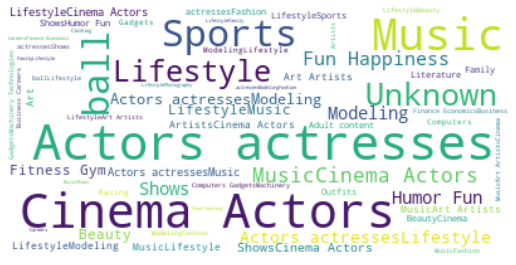

In [36]:
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(13)
plt.imshow(cat_wc, interpolation='bilinear');
plt.axis('off');

### 2. Menampilkan wordcloud berdasarkan kolom Audience Country

**Membuat dataframe baru yang hanya berisi kolom Audience Country**

In [37]:
freq_audco = df_inst['AudienceCountry']
freq_audco

0              India
1          Argentina
2      United States
3      United States
4      United States
           ...      
995            India
996        Indonesia
997           France
998             Iran
999             Iraq
Name: AudienceCountry, Length: 1000, dtype: object

**Menyimpan daftar kolom Audience Country sebagai file txt**

In [38]:
freq_audco = freq_audco.to_csv("audience-country.txt", header=None, index=None, sep=' ', mode='a')

**Membuka file audience-country.txt**

In [39]:
country = open('audience-country.txt','r').read()

**Menghapus stopword yang berlebihan**

In [40]:
stopwords = set(STOPWORDS)

**Inisiasi dan generate wordcloud**

In [41]:
# Inisiasi wordcloud
country_wc = WordCloud(
        background_color='white',
        max_words=1000,
        stopwords=stopwords)

# Generate wordcloud
country_wc.generate(country)

**Menampilkan wordcloud dengan metode fig**

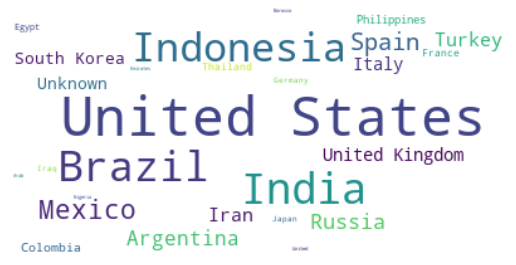

In [42]:
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(13)
plt.imshow(country_wc, interpolation='bilinear');
plt.axis('off');

### 3. Menampilkan wordcloud berdasarkan kolom Name

**Membuat dataframe baru yang hanya berisi kolom Name**

In [43]:
freq_name = df_inst['Name']
freq_name

0                 cristiano
1                  leomessi
2             kendalljenner
3              arianagrande
4                   zendaya
               ...         
995    nimratkhairaofficial
996            hanhyojoo222
997            memphisdepay
998     arminzareeiofficial
999               noorstars
Name: Name, Length: 1000, dtype: object

**Menyimpan daftar kolom Name sebagai file txt**

In [44]:
freq_name = freq_name.to_csv("name.txt", header=None, index=None, sep=' ', mode='a')

**Membuka file name.txt**

In [45]:
name = open('name.txt','r').read()

**Menghapus stopword yang berlebihan**

In [46]:
stopwords = set(STOPWORDS)

**Inisiasi dan generate wordcloud**

In [47]:
# Inisiasi wordcloud
name_wc = WordCloud(
        background_color='white',
        max_words=1000,
        stopwords=stopwords)

# Generate wordcloud
name_wc.generate(name)

**Menampilkan wordcloud dengan metode fig**

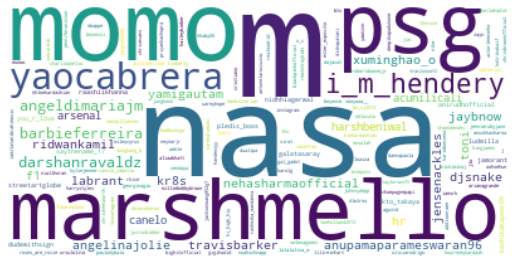

In [48]:
fig = plt.figure()
fig.set_figwidth(9)
fig.set_figheight(13)
plt.imshow(name_wc, interpolation='bilinear');
plt.axis('off');

# E. Overall Analysis
1. Terdapat 5 nama yang memiliki followers lebih banyak dari negara **Indonesia** dan semua member blackpink termasuk ke dalam 5 nama tersebut. 5 nama yang dimaksud yaitu lalalalisa_m, jennierubyjane, sooyaaa__, roses_are_rosie dan bts.bighitofficial.
2. Terdapat 5 nama yang memiliki followers lebih banyak dari negara **US**, 5 nama yang dimaksud yaitu kendalljenner, arianagrande, zendaya, kimkardashian dan kyliejenner.
3. Terdapat 5 nama yang memiliki followers lebih banyak dari negara **India**, 5 nama yang dimaksud yaitu cristiano, virat.kohli, khaby00, justinbieber dan instagram.
4. Terdapat 10 nama teratas menurut followers diantaranya instagram, cristiano, kyliejenner, leomessi, selenagomez, therock, kimkardashian, arianagrande, beyonce dan khloekardashian.
5. Terdapat 10 kategori teratas menurut followers yaitu Photography, Sports with a ball, FashionModelingBeauty, Sports with a ballFamily, MusicLifestyle, Cinema & Actors/actreesFitness & Gym, FashionBeauty, Music, MusicFashion, Clothing & OutfitsLifestyle.
6. Terdapat 3 audience country teratas menurut followers yaitu India, United States dan Argentina.
7. Terdapat 4 kategori yang paling diminati atau paling sering muncul diantaranya Music, Cinema & Actors/actresses, Sports with a ball dan Lifestyle.
8. Terdapat 5 audience country yang paling diminati atau paling sering muncul yaitu dari negara United States, India, Brazil, Indonesia dan Mexico.